In [6]:
# Problem 1
# Write a function to read through the Rolling Stone Top 500 album list and create a 
# dictionary where the key is the primary genre and the value is a list of all of the 
# albums of that genre. For albums that have multiple primary genres, just use the first
# genre listed. Your function should take a filename as a parameter. 
# When your function finishes reading the file, it should print the genre names and the 
# number of albums from each genre that are in the Top 500.  Here is the expected output:

'''
Rolling Stone Top 500 Albums Genre Analysis 
Genre Name 		Number of Albums 
Rock			318
Funk / Soul			51
Electronic			45
Hip Hop			34
Jazz			19
Folk			13
Blues			9
Reggae			7
Pop			2
Latin			1
Classical			1
'''


# Use three tabs between the two columns. (The columns might not line up perfectly.  
# Don’t worry about that.)  The genres should be printed out in the order of most to least for number of albums. 
# Use the function sortDictionaryByValues in the file sortdictionary.py to sort your dictionary. 

# Hint: Use the csv module.  It will make your life quite a bit easier.


'\nRolling Stone Top 500 Albums Genre Analysis \nGenre Name \t\tNumber of Albums \nRock\t\t\t318\nFunk / Soul\t\t\t51\nElectronic\t\t\t45\nHip Hop\t\t\t34\nJazz\t\t\t19\nFolk\t\t\t13\nBlues\t\t\t9\nReggae\t\t\t7\nPop\t\t\t2\nLatin\t\t\t1\nClassical\t\t\t1\n'

In [4]:
import numpy as np 
import pandas as pd
import csv

# take a dictionary where the values in the key value pairs are a list
# sort the dictionary by the length of each value list in the dictionary
# return a new sorted dictionary
# used the internet to help me adapt jason's sortdictionary.py function to account for the length of the list 
def sortDictionaryByValueLength(dictionaryName):
    sortedDictionary = {}
    for k in sorted(dictionaryName, key = lambda k: len(dictionaryName[k]),reverse=True):
        sortedDictionary[k] = dictionaryName[k]
    #print(sortedDictionary)
    return sortedDictionary    
   
# take the rollingStones csv and turn it into a dictionary where the keys are primary genres 
# the values are lists of albums
# print the length of each key value(sorted by length)

def readRollingStones(filename):
    # read the csv into a data frame 
    # create empty dictionary 
    top500DF = pd.read_csv(filename)
    primaryGenreDict = {}
    for i in range(0,len(top500DF)):    # loop through dataframe
        albumGenre = top500DF.iloc[i].loc["Genre"].split(',')[0] # get the first genre (primary genre) 
        albumName = top500DF.iloc[i].loc["Album"]  # get the name of the album
        # append the dictionary --> album genre as the key and album name to the list as a value 
        if albumGenre not in primaryGenreDict:  
            primaryGenreDict[albumGenre] = [albumName]
        else:
            primaryGenreDict[albumGenre].append(albumName)
    print("Genre Name		Number of Albums")
    # Sort the dictionary print out the key and length of each value list in the key (number of albums)
    for genre in sortDictionaryByValueLength(primaryGenreDict):
        print(genre+"			"+str(len(primaryGenreDict[genre])))
    
    return primaryGenreDict    


In [7]:
# Test 
readRollingStones("RollingStoneAlbumList.csv")

Genre Name		Number of Albums
Rock			318
Funk / Soul			51
Electronic			45
Hip Hop			34
Jazz			19
Folk			13
Blues			9
Reggae			7
Pop			2
Classical			1
Latin			1


{'Rock': ["Sgt. Pepper's Lonely Hearts Club Band",
  'Pet Sounds',
  'Revolver',
  'Highway 61 Revisited',
  'Rubber Soul',
  'Exile on Main St.',
  'London Calling',
  'Blonde on Blonde',
  'The Beatles ("The White Album")',
  'The Sun Sessions',
  'The Velvet Underground & Nico',
  'Abbey Road',
  'Are You Experienced',
  'Blood on the Tracks',
  'Nevermind',
  'Born to Run',
  'The Great Twenty_Eight',
  'John Lennon/Plastic Ono Band',
  'Rumours',
  'The Joshua Tree',
  "Who's Next",
  'Led Zeppelin',
  'Bringing It All Back Home',
  'Let It Bleed',
  'Ramones',
  'Music From Big Pink',
  'The Rise and Fall of Ziggy Stardust and the Spiders From Mars',
  'Tapestry',
  'Hotel California',
  'Please Please Me',
  'Forever Changes',
  "Never Mind the Bollocks Here's the Sex Pistols",
  'The Doors',
  'The Dark Side of the Moon',
  'Horses',
  'At Fillmore East',
  "Here's Little Richard",
  'Bridge Over Troubled Water',
  'Meet The Beatles!',
  'Electric Ladyland',
  'Elvis Presley',


In [ ]:
# Problem 2
# Write a function to read through the Rolling Stone Top 500 album list using Pandas and output two columns 
# where the first column is primary genre name and the second column is number of albums in that genre.  
# For albums that have multiple primary genres, just use the first genre listed. 
# Your function should take the csv filename as a parameter. The data should be sorted by number of albums, 
# from greatest to least.

# The output should have identical totals to the output in Problem 1, but just print the two relevant columns.

# Hint: You should probably create a column named “Primary Genre” and populate it accordingly.


In [8]:
# read the rolling stones csv
def rollingStoneTop500(fileName):
    # read in the csv as a dataframe
    top500DF = pd.read_csv(fileName)
    # create a new dataframe to only store the primary genre and album name
    primaryGenreDF = pd.DataFrame(data=None, dtype = int,index =None,columns=['Primary Genre','Number of albums'])
    # loop through the originalDF, store the primary genre, and album name as just 0, as we dont care about it for this dataframe
    for index in range(0,len(top500DF)):
        primaryGenreDF.loc[index] = [top500DF.iloc[index].loc["Genre"].split(',')[0],0]
    #create a new dataframe grouped by the primary genres only, and count the instance of each primary genre
    testDF = primaryGenreDF.groupby("Primary Genre").count()
    # return the final data frame, sorted by the number of albums 
    return testDF.sort_values("Number of albums",ascending=False)


#   I originally had all this commented code that I used to count the length of each group, then i realized i could use count()

#   GenreDict = primaryGenreDF.groupby("Primary Genre").groups # group by the primary genre and save group values in an index
    
#     #finalDF = pd.DataFrame(data=None, dtype = int,index =None,columns=["Primary Genre",'Number of Albums'])
#     indexcounter = 0 
#     for key in GenreDict:
#         indexcounter +=1
#         finalDF.loc[indexcounter] = [key, len(GenreDict[key])]
#     return finalDF.sort_values("Number of Albums",ascending=False).reset_index(drop=True)



In [38]:
# Problem 2 RESUBMIT
# RESUBMIT
def rollingStoneTop500usingApply(filename):
    #read in data into pandas dataframe 
    top500DF = pd.read_csv(filename)
    # create a new column called primary genres, use apply method to split up 
    top500DF["Primary Genre"]= top500DF["Genre"].apply(lambda x: x.split(',')[0])
    # return the count for "Primary Genre" using the value counts function 
    return top500DF["Primary Genre"].value_counts().to_frame()

In [39]:
# resubmit Test
rollingStoneTop500usingApply("RollingStoneAlbumList.csv")

,Primary Genre
Rock,318
Funk / Soul,51
Electronic,45
Hip Hop,34
Jazz,19
Folk,13
Blues,9
Reggae,7
Pop,2
Latin,1


In [9]:
# Test
rollingStoneTop500("RollingStoneALbumList.csv")

,Number of albums
Primary Genre,
Rock,318
Funk / Soul,51
Electronic,45
Hip Hop,34
Jazz,19
Folk,13
Blues,9
Reggae,7
Pop,2


In [ ]:
# Extra Credit
# Using the batting.csv file, determine which year had the most homeruns.  How many homeruns were there?
# Plot the homeruns per year.


The year with the most home runs was 2000, with 5693 homeruns.


C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


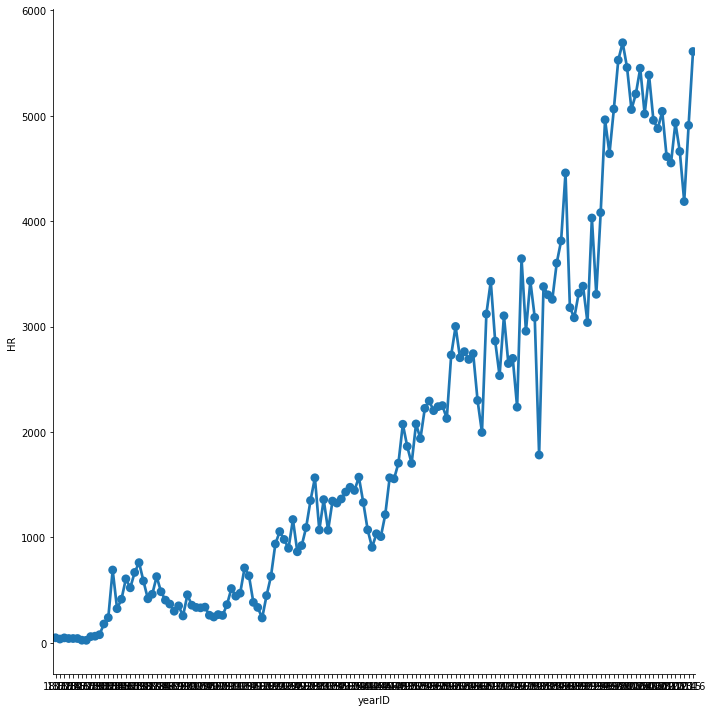

In [43]:
#import seaborn and matplotlib
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline

#Read in the data 
battingDF = pd.read_csv("Batting-Copy1.csv")
# group the data by yearID, and aggreagate each group by the sum of homeruns 
HRbyYearDF= battingDF.groupby('yearID').agg({"HR":sum}).sort_values("HR",ascending=False).reset_index()
# Print year with the most homeruns
print("The year with the most home runs was "+str(HRbyYearDF["yearID"].iloc[0])+", with "+str(HRbyYearDF["HR"].iloc[0])+" homeruns.")
#Plot the homeruns per year
sb.factorplot(x='yearID',y='HR',data = HRbyYearDF,size = 10)

In [12]:

HRbyYearDF.head(1)

,yearID,HR
0,2000,5693
